In [37]:
import numpy as np
import scipy.interpolate as si


def bspline(cv, n=100, degree=3, periodic=False):
    """ Calculate n samples on a bspline

        cv :      Array ov control vertices
        n  :      Number of samples to return
        degree:   Curve degree
        periodic: True - Curve is closed
                  False - Curve is open
    """

    # If periodic, extend the point array by count+degree+1
    cv = np.asarray(cv)
    count = len(cv)

    if periodic:
        factor, fraction = divmod(count+degree+1, count)
        cv = np.concatenate((cv,) * factor + (cv[:fraction],))
        count = len(cv)
        degree = np.clip(degree,1,degree)

    # If opened, prevent degree from exceeding count-1
    else:
        degree = np.clip(degree,1,count-1)


    # Calculate knot vector
    kv = None
    if periodic:
        kv = np.arange(0-degree,count+degree+degree-1)
    else:
        kv = np.clip(np.arange(count+degree+1)-degree,0,count-degree)

    # Calculate query range
    u = np.linspace(periodic,(count-degree),n)


    # Calculate result
    return np.array(si.splev(u, (kv,cv.T,degree))).T

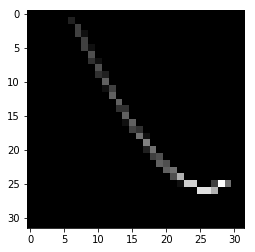

In [44]:
import random
import scipy.misc
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


size = 32

data = np.zeros((size, size))
out = np.zeros((size, size), dtype=np.uint8)

cv = np.array([[ random.random(),  random.random()],
#   [ random.random(),  random.random()],
   [ random.random(),  random.random()],
   [ random.random(),  random.random()]])

points = bspline(cv,n=255,degree=2)

# pprint(points)

for p in points: 
#    pprint (p)
    x= int(p[0]*size)
    y= int(p[1]*size)
    data[x,y] += 1

np.save("swirl.npy", data/255)

# pump up the contrast
out= (data*32).clip(0,255).astype("uint8")
Image.fromarray(out, mode="L").save("swirl.png")

%matplotlib inline
plt.imshow(data, cmap='gray')
